In [1]:
import numpy                       
from matplotlib import pyplot                 
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
#grid
L = 11. #Length of domain in kms
nx = 51 #number of points in domain
x = numpy.linspace(0,L,nx)

In [3]:
# Initial conditions
rho = 20. * numpy.ones(nx)
rho[10:20] = 50.
#B.C
rho_bc = 20.
rho[0] = rho_bc

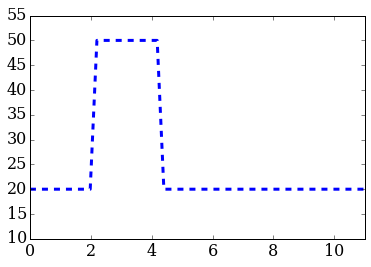

In [4]:
# Look at initial conditions:
pyplot.plot(x, rho, color='b', ls='--', lw=3)
pyplot.ylim(10,55)
pyplot.xlim(0,11);

### Question 1: Enter the *minimum* velocity at time t = 0 in meters per second. Round to 2 decimal places

In [5]:
### Parameters

vmax = 136.*1000./60.  # maximum velocity in meters/minute
rho_max = 250./1000.  # maximum density in cars/meter
dt = 0.001*60.       # time step in minutes
dx = (11./51.)*1000. #spacing in in meters

In [6]:
# @ time t=0, we'll use the initial conditions to find the minimum velocity:

rho_min_t0 = numpy.min(rho)
rho_max_t0 = numpy.max(rho)


In [7]:
print(rho_min_t0), print(rho_max_t0)

20.0
50.0


(None, None)

In [8]:
#vmax/60 * (1 - rho/rho_max)

In [9]:
vmin_t0 = (vmax/60.)*(1-rho_max_t0/250.)

In [10]:
print('the minimum velocity at t=0 is: ', numpy.round(vmin_t0,2), '[m/s]')

the minimum velocity at t=0 is:  30.22 [m/s]


### Question 2: Enter the average velocity at time t = 3 minutes in meters per second. Round to 2 decimal places

In [11]:
T_terminal = 3.0
nt = int(T_terminal/dt)    

CFL = (vmax*dt)/dx

In [12]:
print(nt)

50


In [13]:
# Initial conditions in cars/meter
rho = (20./1000.) * numpy.ones(nx)
rho[10:20] = 50./1000.
#B.C in cars/meter
rho_bc = 20./1000. 
rho[0] = rho_bc

In [14]:
#These results for density are given in cars/meter
#
for n in range(1,nt+1):
    #updates the values of density
    rho_n = rho.copy()
    #
    for i in range(1,nx):
        rho_n[0] = rho_bc
        rho[i] = rho_n[i] - CFL * ( rho_n[i]*(1-rho_n[i]/rho_max) - rho_n[i-1]*(1-rho_n[i-1]/rho_max)  )

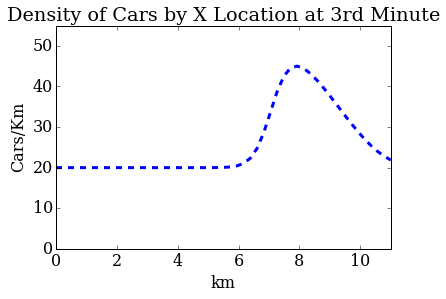

In [15]:
# Look at the results:

pyplot.plot(x, rho*1000, color='b', ls='--', lw=3)
pyplot.title('Density of Cars by X Location at 3rd Minute')
pyplot.xlabel('km')
pyplot.ylabel('Cars/Km')
pyplot.ylim(0,55)
pyplot.xlim(0,11);

In [16]:
# To find average velocty, solve for velocity at each x location and average:
v = numpy.zeros_like(rho, dtype=float)
#
#make sure to convert units to get m/s
vmax = 136.*(1000./3600.) #in meters/sec

In [17]:
for i in range(nx):
    v[i] = (vmax)*(1-rho[i]/rho_max)
#    
v_avg = numpy.average(v)

In [18]:
print('The average velocity after 3 minutes is ', numpy.round(v_avg,2), '[m/s]')

The average velocity after 3 minutes is  33.87 [m/s]


In [19]:
v_min_t3 = numpy.min(v)

In [20]:
print('The minimum velocity after 3 minutes is ', numpy.round(v_min_t3,2), '[m/s]')

The minimum velocity after 3 minutes is  30.97 [m/s]


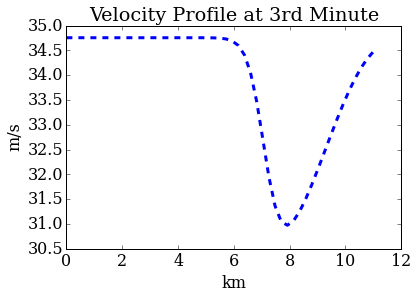

In [21]:
pyplot.plot(x, v, color='b', ls='--', lw=3)
pyplot.title('Velocity Profile at 3rd Minute')
pyplot.xlabel('km')
pyplot.ylabel('m/s');